In [ ]:
!pip install --extra-index-url https://google-coral.github.io/py-repo/ tflite_runtime
!pip install keras-image-helper
!wget https://github.com/alexeygrigorev/large-datasets/releases/download/wasps-bees/bees-wasps.h5

# Question 1
Now convert this model from Keras to TF-Lite format.

What's the size of the converted model?
* 21 Mb
* 43 Mb
* 80 Mb
* 164 Mb

In [7]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.load_model('/kaggle/working/bees-wasps.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

with open('/kaggle/working/bees-wasps.tflite', 'wb') as f_out:
    f_out.write(tflite_model)

In [9]:
import os
os.path.getsize("/kaggle/working/bees-wasps.tflite")

44866200

# Question 2
To be able to use this model, we need to know the index of the
input and the index of the output.

What's the output index for this model?
* 3
* 7
* 13
* 24

In [11]:
import tflite_runtime.interpreter as tflite
from keras_image_helper import create_preprocessor


preprocessor = create_preprocessor('xception', target_size=(299, 299))


interpreter = tflite.Interpreter(model_path='/kaggle/working/bees-wasps.tflite')
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

In [12]:
output_index

13

# Preparing the image
You'll need some code for downloading and resizing images. You can use this code:
```
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img
```
For that, you'll need to have pillow installed:

`!pip install pillow`

Let's download and resize this image:

https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg

Based on the previous homework, what should be the target size for the image?

In [13]:
!pip install pillow

--2023-11-26 13:30:16--  https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg
Resolving habrastorage.org (habrastorage.org)... 51.89.30.72
Connecting to habrastorage.org (habrastorage.org)|51.89.30.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 425350 (415K) [image/jpeg]
Saving to: ‘rtd9dhsmhwrdezeldzoqgijdg8a.jpeg’

rtd9dhsmhwrdezeldzo 100%[===================>] 415.38K   432KB/s    in 1.0s    

2023-11-26 13:30:19 (432 KB/s) - ‘rtd9dhsmhwrdezeldzoqgijdg8a.jpeg’ saved [425350/425350]



In [15]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

In [16]:
img = download_image("https://habrastorage.org/webt/rt/d9/dh/rtd9dhsmhwrdezeldzoqgijdg8a.jpeg")

In [20]:
resized_img = prepare_image(img, (150,150))

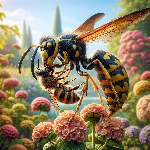

In [21]:
resized_img

# Question 3
Now we need to turn the image into numpy array and pre-process it.

Tip: Check the previous homework. What was the pre-processing we did there?
 
After the pre-processing, what's the value in the first pixel, the R channel?
* 0.3450980
* 0.5450980
* 0.7450980
* 0.9450980

In [22]:
import numpy as np

def prepare(x):
    return x / 255.0
x = np.array(resized_img, dtype='float32')
X = np.array([x])
X = prepare(X)

In [23]:
X[0, 0, 0, 0]

0.94509804

# Question 4
Now let's apply this model to this image. What's the output of the model?
* 0.258
* 0.458
* 0.658
* 0.858

In [24]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [25]:
preds

array([[0.6592137]], dtype=float32)

# Prepare the lambda code
Now you need to copy all the code into a separate python file. 

You will need to use this file for the next two questions.

Tip: you can test this file locally with ipython or Jupyter Notebook by importing the file and invoking the function from this file.